# Q5: Pattern Analysis

**Phase 6:** Pattern Analysis & Advanced Visualization  
**Points: 6 points**

**Focus:** Identify trends over time, analyze seasonal patterns, create correlation analysis.

**Lecture Reference:** Lecture 11, Notebook 3 ([`11/demo/03_pattern_analysis_modeling_prep.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/03_pattern_analysis_modeling_prep.ipynb)), Phase 6. Also see Lecture 08 (groupby) and Lecture 07 (visualization).

---

## Setup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load feature-engineered data from Q4
df = pd.read_csv('output/q4_features.csv', parse_dates=['Measurement Timestamp'], index_col='Measurement Timestamp')
# Or if you saved without index:
# df = pd.read_csv('output/q4_features.csv')
# df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'])
# df = df.set_index('Measurement Timestamp')
print(f"Loaded {len(df):,} records with features")

Loaded 196,526 records with features


---

## Objective

Identify trends over time, analyze seasonal patterns, and create correlation analysis.

**Time Series Note:** Time series data has temporal patterns (trends, seasonality, cycles). Use time-based aggregations and visualizations to identify these patterns. See **Lecture 09** for time series decomposition and pattern analysis. Use pandas `resample()` to aggregate by time periods (e.g., `resample('ME')` for monthly, `resample('D')` for daily) and `groupby()` with temporal features (hour, day_of_week, month) to identify patterns.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q5_correlations.csv`
**Format:** CSV file
**Content:** Correlation matrix (can be subset of key variables)
**Requirements:**
- Square matrix with variable names as both index and columns
- Values are correlation coefficients (between -1 and 1)
- Can be subset of key variables (e.g., top 10 most important variables)
- **Include index/column names** when saving: `corr_matrix.to_csv('output/q5_correlations.csv')`

**Example format:**
```csv
,Air Temperature,Water Temperature,Wind Speed,Humidity
Air Temperature,1.0,0.847,-0.234,-0.156
Water Temperature,0.847,1.0,0.123,0.089
Wind Speed,-0.234,0.123,1.0,0.456
Humidity,-0.156,0.089,0.456,1.0
```

### 2. `output/q5_patterns.png`
**Format:** PNG image file
**Content:** Advanced visualizations showing trends/seasonality
**Required visualizations (at least 2 of these):**
1. **Trend over time:** Line plot showing variable(s) over time (e.g., monthly averages)
2. **Seasonal pattern:** Bar plot or line plot showing patterns by month, day of week, or hour
3. **Correlation heatmap:** Heatmap of correlation matrix
4. **Multi-panel plot:** Multiple subplots showing different patterns

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 3. `output/q5_trend_summary.txt`
**Format:** Plain text file
**Content:** Brief text summary of key patterns identified
**Required information:**
- Temporal trends (increasing, decreasing, stable)
- Seasonal patterns (daily, weekly, monthly cycles)
- Key correlations (mention 2-3 strongest correlations)

**Example format:**
```
KEY PATTERNS IDENTIFIED
======================

TEMPORAL TRENDS:
- Air and water temperatures show clear seasonal patterns
- Higher temperatures in summer months (June-August)
- Lower temperatures in winter months (December-February)
- Monthly air temp range: 4.2°C to 25.8°C

DAILY PATTERNS:
- Temperature shows diurnal cycle (warmer during day, cooler at night)
- Peak air temp typically at hour 14-15 (2-3 PM)
- Minimum air temp typically at hour 5-6 (5-6 AM)

CORRELATIONS:
- Air Temp vs Water Temp: 0.847 (strong positive correlation)
- Air Temp vs Humidity: -0.234 (moderate negative correlation)
- Wind Speed vs Wave Height: 0.612 (moderate positive correlation)
```

---

## Requirements Checklist

- [ ] Trends over time identified (increasing, decreasing, stable)
- [ ] Seasonal patterns analyzed (daily, weekly, monthly cycles)
- [ ] Correlation analysis completed
- [ ] Advanced visualizations created (multi-panel plots, grouped visualizations)
- [ ] Key patterns documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Identify trends** - Use `.resample()` to aggregate by time period and visualize long-term patterns
2. **Analyze seasonal patterns** - Use `.groupby()` with temporal features (hour, day_of_week, month)
3. **Create correlation analysis** - Compute correlation matrix for numeric columns
4. **Create visualizations** - Multi-panel plot showing trends, seasonal patterns, and correlations
5. **Document patterns** - Summarize key findings in text file

---

## Decision Points

- **Trend identification:** Is there a long-term trend? Is it increasing, decreasing, or stable? Use time series plots to visualize.
- **Seasonal patterns:** Are there daily patterns? Weekly? Monthly? Use aggregations and visualizations to identify.
- **Correlation analysis:** Which variables are correlated? Use correlation matrix and heatmaps. Focus on relationships that might be useful for modeling.

---

## Checkpoint

After Q5, you should have:
- [ ] Trends identified
- [ ] Seasonal patterns analyzed
- [ ] Correlations calculated
- [ ] Pattern visualizations created
- [ ] All 3 artifacts saved: `q5_correlations.csv`, `q5_patterns.png`, `q5_trend_summary.txt`

---

**Next:** Continue to `q6_modeling_preparation.md` for Modeling Preparation.


## Part 1

In [8]:
#Same read data
df_corr = pd.read_csv("output/q4_rolling_features.csv")

# num only
numeric_cols = df_corr.select_dtypes(include=['float64', 'int64']).columns

# calculate matrix
corr_matrix = df_corr[numeric_cols].corr()

#save
corr_matrix.to_csv("output/q5_correlations.csv")
print("Saved to output/q5_correlations.csv")
print(corr_matrix.head())

Saved to output/q5_correlations.csv
                      Air Temperature  Wet Bulb Temperature  Humidity  \
Air Temperature              1.000000              0.744171  0.008477   
Wet Bulb Temperature         0.744171              1.000000  0.108718   
Humidity                     0.008477              0.108718  1.000000   
Rain Intensity                    NaN                   NaN       NaN   
Interval Rain                     NaN                   NaN       NaN   

                      Rain Intensity  Interval Rain  Total Rain  \
Air Temperature                  NaN            NaN    0.426341   
Wet Bulb Temperature             NaN            NaN    0.549735   
Humidity                         NaN            NaN    0.100793   
Rain Intensity                   NaN            NaN         NaN   
Interval Rain                    NaN            NaN         NaN   

                      Precipitation Type  Wind Direction  Wind Speed  \
Air Temperature                      NaN       -0.

## Part 2

Saved to output/q5_patterns.png


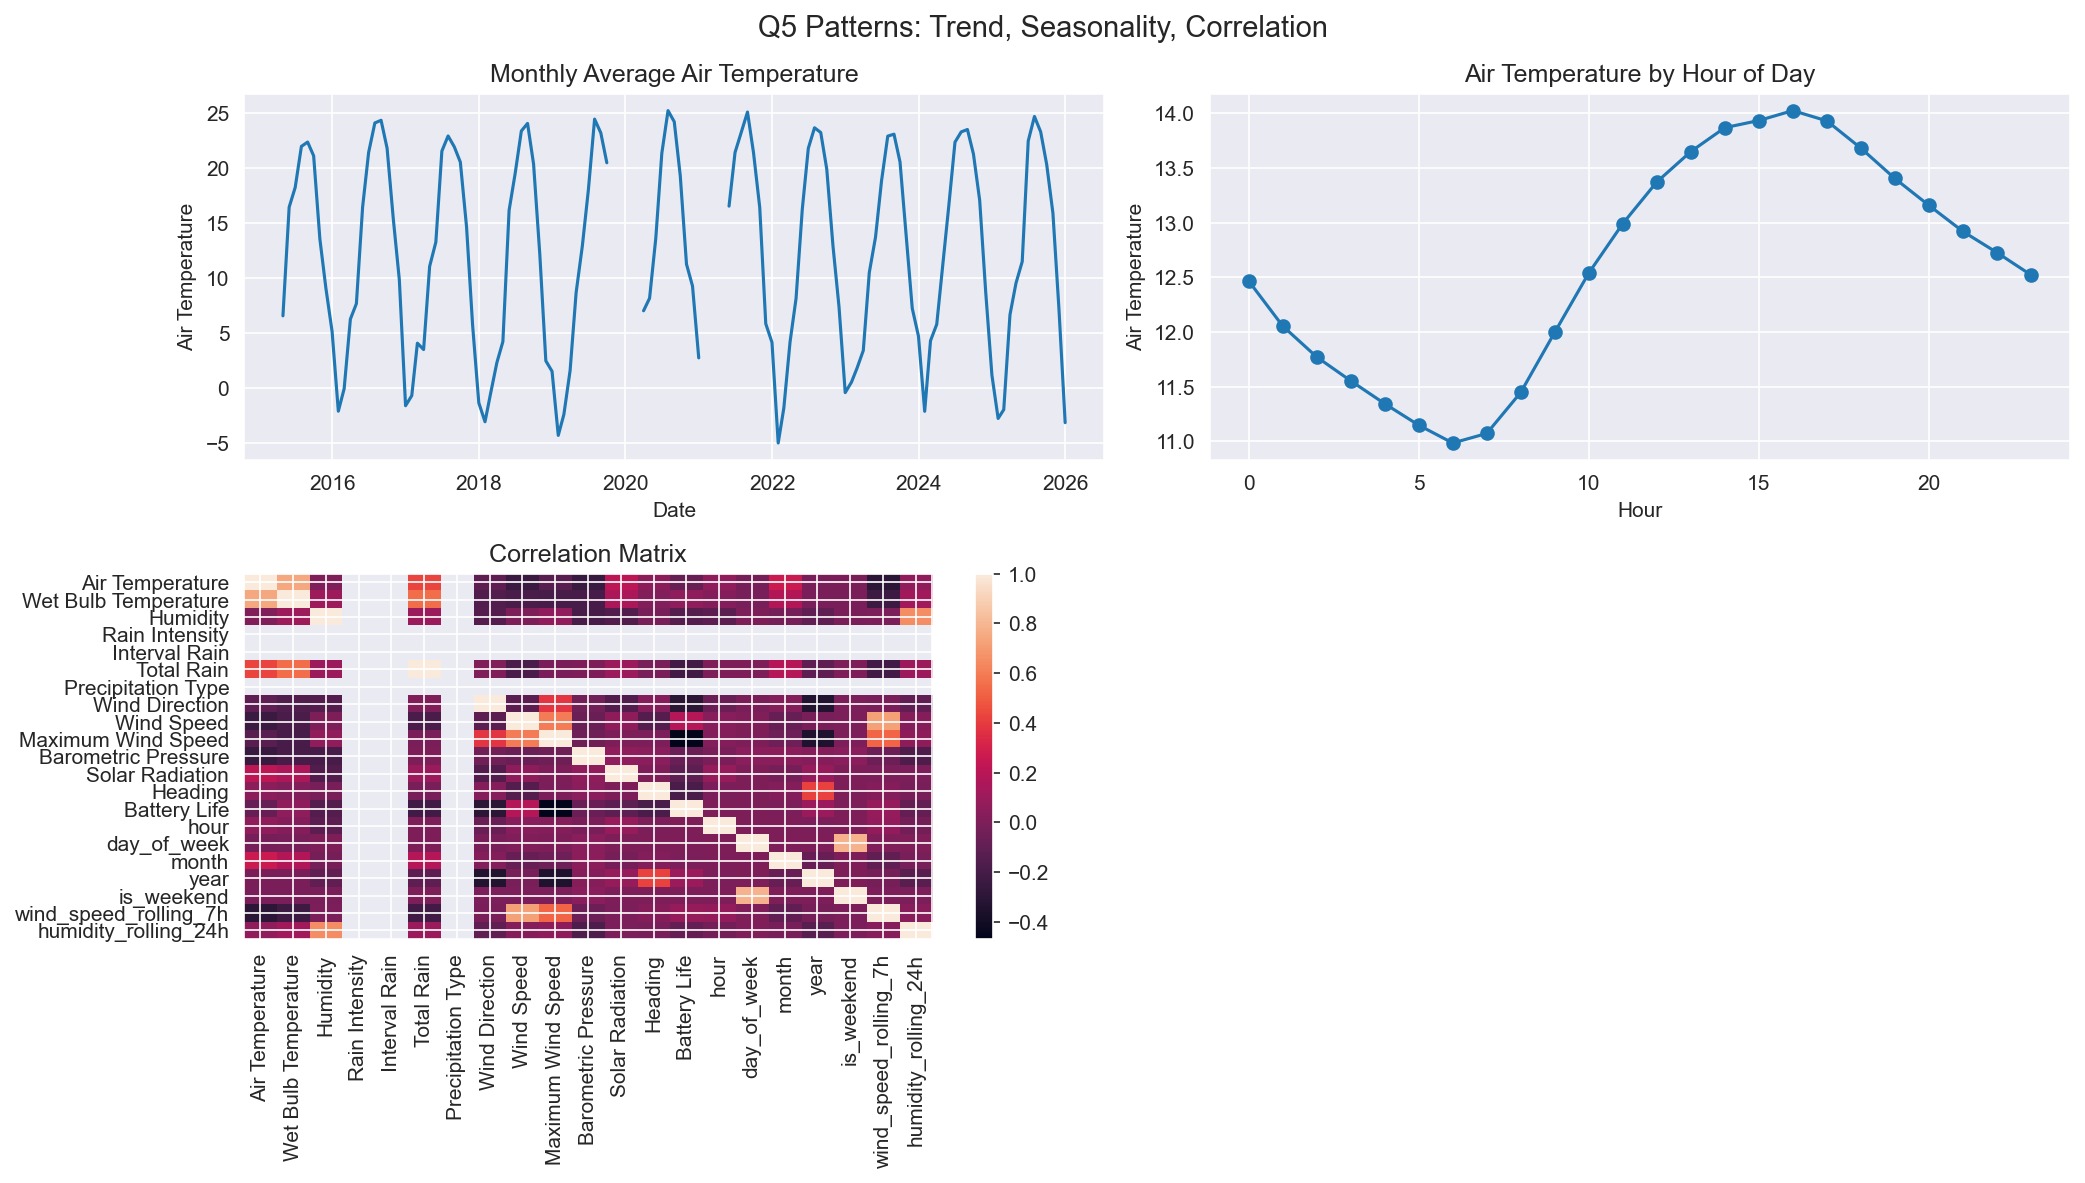

In [9]:
#I wanna read data again
df_vis = pd.read_csv("output/q4_rolling_features.csv")
df_vis["Measurement Timestamp"] = pd.to_datetime(
    df_vis["Measurement Timestamp"],
    errors="coerce"
)

#most important feature
var = "Air Temperature"

df_monthly = (
    df_vis.set_index("Measurement Timestamp")[var]
          .resample("ME")
          .mean()
)

df_hourly = df_vis.groupby("hour")[var].mean()
#draw
plt.figure(figsize=(14, 8), dpi=150)
#monthly
plt.subplot(2, 2, 1)
plt.plot(df_monthly.index, df_monthly.values)
plt.title(f"Monthly Average {var}")
plt.xlabel("Date")
plt.ylabel(var)
#hourly
plt.subplot(2, 2, 2)
plt.plot(df_hourly.index, df_hourly.values, marker="o")
plt.title(f"{var} by Hour of Day")
plt.xlabel("Hour")
plt.ylabel(var)
#heat map
plt.subplot(2, 2, 3)
im = plt.imshow(corr_matrix, aspect="auto")
plt.colorbar(im)
plt.title("Correlation Matrix")
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)
plt.suptitle("Q5 Patterns: Trend, Seasonality, Correlation", fontsize=14)
plt.tight_layout()
#save
plt.savefig("output/q5_patterns.png", dpi=150)
print("Saved to output/q5_patterns.png")

## Part3

In [11]:
# monthly trend
monthly_min = df_monthly.min()
monthly_max = df_monthly.max()

# daily pattern
peak_hour = df_hourly.idxmax()
low_hour = df_hourly.idxmin()

# 3. corr
numeric_cols = corr_matrix.columns

corr_pairs = []
for c1 in numeric_cols:
    for c2 in numeric_cols:
        if c1 != c2:
            corr_pairs.append((c1, c2, corr_matrix.loc[c1, c2]))

# top corr
corr_pairs_sorted = sorted(corr_pairs, key=lambda x: abs(x[2]), reverse=True)
top_corrs = corr_pairs_sorted[:3]

# summary txt
text = ""
text += "KEY PATTERNS IDENTIFIED\n"
text += "=======================\n\n"

text += "TEMPORAL TRENDS:\n"
text += f"- Monthly {var} ranges from {monthly_min:.2f} to {monthly_max:.2f}\n"
text += f"- {var} shows seasonal variation: higher in warm months, lower in cold months\n\n"

text += "DAILY PATTERNS:\n"
text += f"- Daily cycle observed in {var}\n"
text += f"- Peak typically at hour {peak_hour}\n"
text += f"- Minimum typically at hour {low_hour}\n\n"

text += "TOP CORRELATIONS:\n"
for (c1, c2, corr) in top_corrs:
    text += f"- {c1} vs {c2}: {corr:.3f}\n"

# save
with open("output/q5_trend_summary.txt", "w") as f:
    f.write(text)

print("Saved to output/q5_trend_summary.txt")
print(text)


Saved to output/q5_trend_summary.txt
KEY PATTERNS IDENTIFIED

TEMPORAL TRENDS:
- Monthly Air Temperature ranges from -5.04 to 25.25
- Air Temperature shows seasonal variation: higher in warm months, lower in cold months

DAILY PATTERNS:
- Daily cycle observed in Air Temperature
- Peak typically at hour 16
- Minimum typically at hour 6

TOP CORRELATIONS:
- Air Temperature vs Wet Bulb Temperature: 0.744
- Air Temperature vs Rain Intensity: nan
- Air Temperature vs Interval Rain: nan

